In [175]:
# install libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify 

In [62]:
# load data into dataframe
parks_df = pd.read_csv('biodiversity-parks/parks.csv')
species_df = pd.read_csv('biodiversity-parks/species.csv',low_memory=False)

In [53]:
parks_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [276]:
num_parks = parks_df['Park Name'].nunique()
print(f"Number of parks: {num_parks}")

Number of parks: 56


In [54]:
species_df.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


## Question 1

How does biodiversity vary across different geographic regions? Are there certain areas with higher biodiversity compared to others?

In [79]:
# add column to parks_df with info about geographic region

geographicRegions = {}

# New England states
geographicRegions["New England"] = ["ME", "VT", "NH", "MA", "RI", "CT"]

# Southwest states
# mostly arid and semi-arid climate, with hot and dry summers and cool and dry winters
geographicRegions["Southwest"] = ["NV", "AZ", "NM", "TX"]

# Great Plains: Iowa, Kansas, Missouri, Nebraska, Oklahoma, North Dakota, and South Dakota
# known as America's breadbasket because of its large agricultural output
geographicRegions["Great Plains"] = ["ND", "SD", "NE", "KS", "OK"]

# Midwest states
geographicRegions["Midwest"] = ["MN", "IA", "MO", "WI", "IL", "MI", "IN", "OH"]

# west coast
geographicRegions["West Coast"] = ["WA", "OR", "CA"]

# rocky mountain
geographicRegions["Rocky Mountain"] = ["MT", "WY", "CO", "UT", "ID"]

# mid atlantic
geographicRegions["Mid Atlantic"] = ["NY", "PA", "MD", "DE", "NJ"]

# south
geographicRegions["South"] = ["WV", "VA", "NC", "SC", "GA", "FL", "AL", "MS", "AR", "LA", "TN", "KY"]

# alaska
geographicRegions["Alaska"] = ["AK"]

# hawaii
geographicRegions["Hawaii"] = ["HI"]

# reverse mapping for state to region
state_to_region = {state: region for region, states in geographicRegions.items() for state in states}

In [63]:
# Some parks have multiple States. Count 1 park per each state.
states_split = parks_df['State'].str.split(', ')
states_split = states_split.explode('State')
states_split_final = pd.concat([parks_df.drop(columns=['State']), states_split], axis=1)
states_split_final.head()
print(states_split_final['State'].unique())

['ME' 'UT' 'SD' 'TX' 'FL' 'CO' 'NM' 'CA' 'SC' 'OR' 'OH' 'AK' 'NV' 'MT'
 'AZ' 'TN' 'NC' 'WY' 'HI' 'AR' 'MI' 'KY' 'WA' 'VA' 'ND' 'MN' 'ID']


In [118]:
states_split_final["Region"] = states_split_final["State"].map(state_to_region)
states_split_final.head()


,Park Code,Park Name,Acres,Latitude,Longitude,State,Region
0,ACAD,Acadia National Park,47390.0,44.35,-68.21,ME,New England
1,ARCH,Arches National Park,76519.0,38.68,-109.57,UT,Rocky Mountain
2,BADL,Badlands National Park,242756.0,43.75,-102.50,SD,Great Plains
3,BIBE,Big Bend National Park,801163.0,29.25,-103.25,TX,Southwest
4,BISC,Biscayne National Park,172924.0,25.65,-80.08,FL,South


In [119]:
grouped_by_park = species_df.groupby("Park Name")["Species ID"].nunique().reset_index()
grouped_by_park.columns = ["Park Name", "Unique Species"]
grouped_by_park.head()

,Park Name,Unique Species
0,Acadia National Park,1709
1,Arches National Park,1048
2,Badlands National Park,1389
3,Big Bend National Park,2269
4,Biscayne National Park,1726


In [120]:
parks_grouped_by_state = states_split_final.groupby("State")["Park Name"].nunique().reset_index()
parks_grouped_by_state.columns = ["State", "Number of Parks"]
parks_grouped_by_state.head()

,State,Number of Parks
0,AK,8
1,AR,1
2,AZ,3
3,CA,7
4,CO,4


In [121]:
region_species_cnt_df = pd.merge(grouped_by_park, states_split_final[["Park Name", "State", "Region"]], on="Park Name", how="left")
region_species_cnt_df.head()

,Park Name,Unique Species,State,Region
0,Acadia National Park,1709,ME,New England
1,Arches National Park,1048,UT,Rocky Mountain
2,Badlands National Park,1389,SD,Great Plains
3,Big Bend National Park,2269,TX,Southwest
4,Biscayne National Park,1726,FL,South


In [127]:
states_per_region =  region_species_cnt_df[["State", "Region"]]
states_per_region = states_per_region.drop_duplicates()
states_per_region = states_per_region.groupby("Region").agg({
    "States": "count"
})
display(states_per_region)

,State
Region,
Alaska,1
Great Plains,2
Hawaii,1
Midwest,3
New England,1
Rocky Mountain,4
South,7
Southwest,4
West Coast,3


In [91]:
species_per_state_df = region_species_cnt_df.groupby("State").agg({
    "Unique Species": "sum"
}).reset_index()
print(species_per_state_df.head())

  State  Unique Species
0    AK           15945
1    AR            2294
2    AZ           11917
3    CA           14775
4    CO           13087


In [103]:
final_q1_df = pd.merge(parks_grouped_by_state, species_per_state_df, on="State")
final_q1_df["Region"] = final_q1_df["State"].map(state_to_region)

final_q1_df = final_q1_df.groupby("Region").agg({
    "Number of Parks": "sum",
    "Unique Species": "sum"
}).reset_index()

final_q1_df = final_q1_df.sort_values(by="Unique Species", ascending=False)

display(final_q1_df)

,Region,Number of Parks,Unique Species
5,Rocky Mountain,11,24543
8,West Coast,11,22752
7,Southwest,8,22490
6,South,9,16750
0,Alaska,8,15945
1,Great Plains,3,6750
3,Midwest,3,4962
2,Hawaii,2,3347
4,New England,1,1709


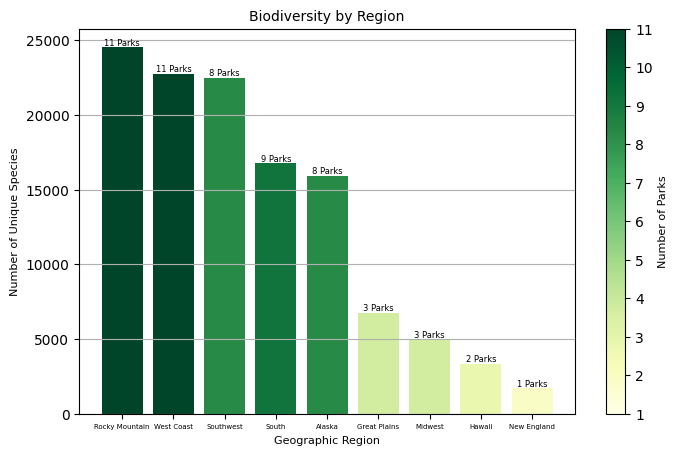

In [117]:
# plot results
# color map to indicate parks per state
color_map = plt.get_cmap("YlGn")
colors = color_map(final_q1_df['Number of Parks'] / final_q1_df['Number of Parks'].max())

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(final_q1_df['Region'], final_q1_df['Unique Species'], color=colors)

# Add labels on top of each bar
for bar, quality in zip(bars, final_q1_df["Number of Parks"]):
    yval = bar.get_height()  # Get the height of the bar
    ax.text(bar.get_x() + bar.get_width() / 2, yval, str(quality) + " Parks", 
            ha='center', va='bottom', fontsize=6)  # Center the label above the bar


# Create a color bar as a legend
norm = plt.Normalize(final_q1_df['Number of Parks'].min(), final_q1_df['Number of Parks'].max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib

# Add color bar to the plot
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Parks', fontsize=8)
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
cbar.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])


# Custom axis labels
ax.set_xlabel('Geographic Region', fontsize=8)
ax.set_ylabel('Number of Unique Species', fontsize=8)
ax.set_title('Biodiversity by Region', fontsize=10)
ax.tick_params(axis='x', labelsize=5) 

# Show grid for better readability
ax.grid(axis='y')

# Display the plot
plt.tight_layout
plt.show()


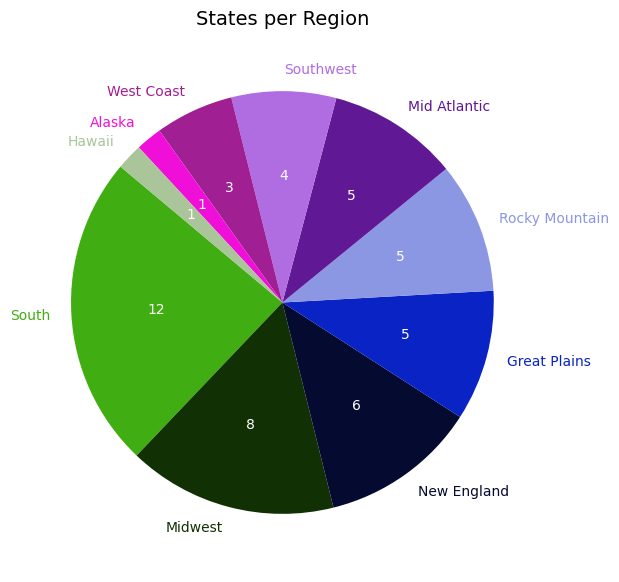

In [149]:
# Create a pie chart
state_sums = {key: len(value) for key, value in geographicRegions.items()}
state_sums = dict(sorted(state_sums.items(), key=lambda item: item[1], reverse=True))
regions = list(state_sums.keys())
states_cnt = list(state_sums.values())

def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}'

colors = ['#40ae12', '#113004', '#040a30', "#0923c5", "#8b97e2", "#601895", "#b06de1", "#a01f93", "#f00fd9", "#a9c599"] 

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 7))

wedges, texts, autotexts = ax.pie(states_cnt, labels=regions, autopct=lambda pct: func(pct, states_cnt), shadow=False, startangle=140, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Customize label colors to match pie slices
for i, text in enumerate(texts):
    text.set_color(colors[i])  # Set the label color to match the slice color

for i, autotext in enumerate(autotexts):
    autotext.set_color("#ffffff") 

# Title
plt.title('States per Region', fontsize=14)

# Display the pie chart
plt.show()


## Question 2
What are the common species found across parks of different sizes or locations? Are there patterns in species composition based on park characteristics

In [151]:
species_df.head(2)

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN


In [160]:
species_park_cnt_df = species_df.groupby("Scientific Name").agg({
    "Park Name": "count",
}).reset_index()

species_park_cnt_df.columns = ["Scientific Name", "Park Count"]

parks_per_species = species_df.groupby("Scientific Name")["Park Name"].agg(lambda x: list(set(map(str,x)))).reset_index()

print("Park Count per Species")
print(species_park_cnt_df.head())
print("\n")

print("Parks per Species")
print(parks_per_species.head())

Park Count per Species
         Scientific Name  Park Count
0             Aaptolasma           1
1               Abacidus           1
2         Abaeis nicippe           3
3  Abagrotis discoidalis           1
4       Abagrotis duanca           1


Parks per Species
         Scientific Name                                          Park Name
0             Aaptolasma                    [Cuyahoga Valley National Park]
1               Abacidus                     [Rocky Mountain National Park]
2         Abaeis nicippe  [Shenandoah National Park, Grand Canyon Nation...
3  Abagrotis discoidalis                        [Great Basin National Park]
4       Abagrotis duanca                        [Great Basin National Park]


In [184]:
final_q2_df1 = pd.merge(species_park_cnt_df, parks_per_species, on="Scientific Name")
final_q2_df1 = final_q2_df1.explode("Park Name")
final_q2_df1 = pd.merge(final_q2_df1, states_split_final[["Park Name", "State", "Region", "Acres"]], on="Park Name")
final_q2_df1 = pd.merge(final_q2_df1, species_df[["Common Names", "Scientific Name"]], on="Scientific Name")
final_q2_df1 = final_q2_df1.sort_values(by="Park Count", ascending=False)
final_q2_df1 = final_q2_df1.drop_duplicates(subset=['Park Name', 'Scientific Name']).reset_index(drop=True)

final_q2_df1.head()


,Scientific Name,Park Count,Park Name,State,Region,Acres,Common Names
0,Falco peregrinus,56,North Cascades National Park,CO,Rocky Mountain,504781.0,Peregrine Falcon
1,Falco peregrinus,56,Death Valley National Park,CA,West Coast,4740912.0,Peregrine Falcon
2,Falco peregrinus,56,Yosemite National Park,AK,Alaska,761266.0,Peregrine Falcon
3,Falco peregrinus,56,Olympic National Park,WA,West Coast,922651.0,Peregrine Falcon
4,Falco peregrinus,56,Kobuk Valley National Park,AK,Alaska,1750717.0,Peregrine Falcon


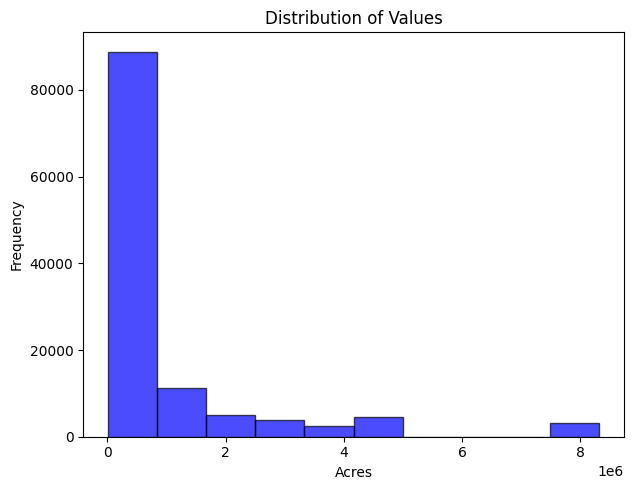

In [185]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(final_q2_df1['Acres'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Acres')
plt.ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

In [186]:
min_size, max_size, avg_size = final_q2_df1["Acres"].min(), final_q2_df1["Acres"].max(), final_q2_df1["Acres"].mean()
print(f"Min park size: {min_size} acres")
print(f"Max park size: {max_size} acres")
print(f"Average park size: {avg_size} acres")

Min park size: 5550.0 acres
Max park size: 8323148.0 acres
Average park size: 932297.2776065763 acres


In [206]:
# 5,000 to 350,000
size_range_1_lower, size_range_1_upper = 5000, 70000
size_range_1_df = final_q2_df1[(final_q2_df1["Acres"] >= size_range_1_lower) & (final_q2_df1["Acres"] <= size_range_1_upper)]
num_parks_1 = size_range_1_df['Park Name'].nunique()
print(f"Number of parks >= {size_range_1_lower} acres and <= {size_range_1_upper} = {num_parks_1}")
display(size_range_1_df.head())
print("\n")
# 350,001 to 600,000 
size_range_2_lower, size_range_2_upper = 70000, 200000
size_range_2_df = final_q2_df1[(final_q2_df1["Acres"] >= size_range_2_lower) & (final_q2_df1["Acres"] <= size_range_2_upper)]
num_parks_2 = size_range_2_df['Park Name'].nunique()
print(f"Number of parks >= {size_range_2_lower} acres and <= {size_range_2_upper} = {num_parks_2}")
display(size_range_2_df.head())
print("\n")

# 600,001 to 99,000
size_range_3_lower, size_range_3_upper = 200000, 990000
size_range_3_df = final_q2_df1[(final_q2_df1["Acres"] >= size_range_3_lower) & (final_q2_df1["Acres"] <= size_range_3_upper)]
num_parks_3 = size_range_3_df['Park Name'].nunique()
print(f"Number of parks >= {size_range_3_lower} acres and <= {size_range_3_upper} = {num_parks_3}")
display(size_range_3_df.head())
print("\n")

# above 1,000,000
size_range_4_df = final_q2_df1[(final_q2_df1["Acres"] >= size_range_3_upper)]
num_parks_4 = size_range_4_df['Park Name'].nunique()
print(f"Number of parks >= {size_range_3_upper} = {num_parks_4}")
display(size_range_4_df.head())
print("\n")

Number of parks >= 5000 acres and <= 70000 = 14


,Scientific Name,Park Count,Park Name,State,Region,Acres,Common Names
7,Falco peregrinus,56,Great Sand Dunes National Park and Preserve,AZ,Southwest,42984.0,Peregrine Falcon
11,Falco peregrinus,56,Dry Tortugas National Park,NV,Southwest,64701.0,Peregrine Falcon
14,Falco peregrinus,56,Haleakala National Park,WY,Rocky Mountain,29094.0,Peregrine Falcon
23,Falco peregrinus,56,Pinnacles National Park,WA,West Coast,26606.0,Peregrine Falcon
26,Falco peregrinus,56,Acadia National Park,ME,New England,47390.0,Peregrine Falcon




Number of parks >= 70000 acres and <= 200000 = 12


,Scientific Name,Park Count,Park Name,State,Region,Acres,Common Names
5,Falco peregrinus,56,Guadalupe Mountains National Park,NC,South,86416.0,Peregrine Falcon
21,Falco peregrinus,56,Biscayne National Park,FL,South,172924.0,Peregrine Falcon
22,Falco peregrinus,56,Lassen Volcanic National Park,AK,Alaska,106372.0,Peregrine Falcon
24,Falco peregrinus,56,Arches National Park,UT,Rocky Mountain,76519.0,Peregrine Falcon
25,Falco peregrinus,56,Great Basin National Park,AK,Alaska,77180.0,Peregrine Falcon




Number of parks >= 200000 acres and <= 990000 = 18


,Scientific Name,Park Count,Park Name,State,Region,Acres,Common Names
0,Falco peregrinus,56,North Cascades National Park,CO,Rocky Mountain,504781.0,Peregrine Falcon
2,Falco peregrinus,56,Yosemite National Park,AK,Alaska,761266.0,Peregrine Falcon
3,Falco peregrinus,56,Olympic National Park,WA,West Coast,922651.0,Peregrine Falcon
6,Falco peregrinus,56,Canyonlands National Park,UT,Rocky Mountain,337598.0,Peregrin Falcon
9,Falco peregrinus,56,Voyageurs National Park,VA,South,218200.0,Peregrine Falcon




Number of parks >= 990000 = 12


,Scientific Name,Park Count,Park Name,State,Region,Acres,Common Names
1,Falco peregrinus,56,Death Valley National Park,CA,West Coast,4740912.0,Peregrine Falcon
4,Falco peregrinus,56,Kobuk Valley National Park,AK,Alaska,1750717.0,Peregrine Falcon
8,Falco peregrinus,56,Wrangell - St Elias National Park and Preserve,MN,Midwest,8323148.0,Peregrine Falcon
12,Falco peregrinus,56,Glacier Bay National Park and Preserve,MT,Rocky Mountain,3224840.0,Peregrine Falcon
16,Falco peregrinus,56,Katmai National Park and Preserve,MI,Midwest,3674530.0,"American Peregrine Falcon, Duck Hawk, Peregrin..."


In [266]:
size_range_1_df_final = size_range_1_df[["Scientific Name", "Common Names", "Park Count"]].drop_duplicates(subset=['Scientific Name']).nlargest(10, 'Park Count')
display(size_range_1_df_final)

size_range_2_df_final = size_range_2_df[["Scientific Name", "Common Names", "Park Count"]].drop_duplicates(subset=['Scientific Name']).nlargest(10, 'Park Count')
display(size_range_2_df_final)

size_range_3_df_final = size_range_3_df[["Scientific Name", "Common Names", "Park Count"]].drop_duplicates(subset=['Scientific Name']).nlargest(10, 'Park Count')
display(size_range_3_df_final)

size_range_4_df_final = size_range_1_df[["Scientific Name", "Common Names", "Park Count"]].drop_duplicates(subset=['Scientific Name']).nlargest(10, 'Park Count')
display(size_range_4_df_final)

,Scientific Name,Common Names,Park Count
7,Falco peregrinus,Peregrine Falcon,56
60,Circus cyaneus,Northern Harrier,55
112,Accipiter striatus,"Northern Sharp-Shinned Hawk, Sharp-Shinned Hawk",54
127,Pandion haliaetus,"American Osprey, Fish Hawk, Osprey",54
176,Tachycineta bicolor,Tree Swallow,54
275,Regulus calendula,Ruby-Crowned Kinglet,53
282,Melospiza lincolnii,Lincoln's Sparrow,53
301,Anas platyrhynchos,Mallard,53
309,Turdus migratorius,American Robin,53
453,Branta canadensis,Canada Goose,53


,Scientific Name,Common Names,Park Count
5,Falco peregrinus,Peregrine Falcon,56
61,Circus cyaneus,Northern Harrier,55
111,Accipiter striatus,Sharp-Shinned Hawk,54
113,Tachycineta bicolor,Tree Swallow,54
125,Pandion haliaetus,Osprey,54
274,Regulus calendula,Ruby-Crowned Kinglet,53
285,Melospiza lincolnii,Lincoln's Sparrow,53
304,Anas platyrhynchos,Mallard,53
310,Turdus migratorius,American Robin,53
457,Branta canadensis,Canada Goose,53


,Scientific Name,Common Names,Park Count
0,Falco peregrinus,Peregrine Falcon,56
56,Circus cyaneus,Northern Harrier,55
118,Tachycineta bicolor,Tree Swallow,54
132,Pandion haliaetus,Osprey,54
212,Accipiter striatus,Sharp-Shinned Hawk,54
273,Regulus calendula,Ruby-Crowned Kinglet,53
307,Anas platyrhynchos,Mallard,53
323,Turdus migratorius,Robin,53
379,Melospiza lincolnii,Lincoln's Sparrow,53
455,Branta canadensis,Canada Goose,53


,Scientific Name,Common Names,Park Count
7,Falco peregrinus,Peregrine Falcon,56
60,Circus cyaneus,Northern Harrier,55
112,Accipiter striatus,"Northern Sharp-Shinned Hawk, Sharp-Shinned Hawk",54
127,Pandion haliaetus,"American Osprey, Fish Hawk, Osprey",54
176,Tachycineta bicolor,Tree Swallow,54
275,Regulus calendula,Ruby-Crowned Kinglet,53
282,Melospiza lincolnii,Lincoln's Sparrow,53
301,Anas platyrhynchos,Mallard,53
309,Turdus migratorius,American Robin,53
453,Branta canadensis,Canada Goose,53


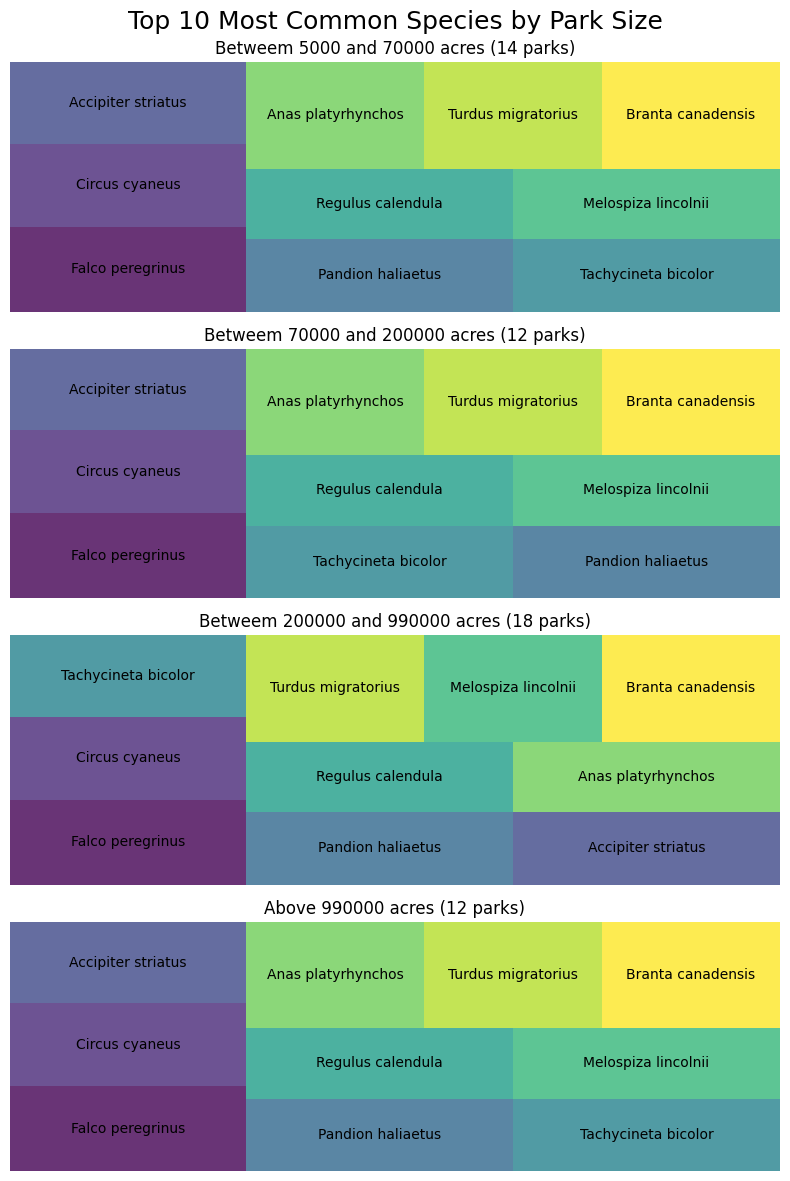

In [275]:
# Create a figure with three vertically stacked subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Create a color mapping for unique scientific names
unique_names = size_range_1_df_final['Scientific Name'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_names)))
color_mapping = dict(zip(unique_names, colors))

axs[0] = squarify.plot(sizes=size_range_1_df_final["Park Count"], label=size_range_1_df_final["Scientific Name"],alpha=.8,ax=axs[0],color=[color_mapping[name] for name in size_range_1_df_final["Scientific Name"]])
axs[0].set_title(f"Betweem {size_range_1_lower} and {size_range_1_upper} acres ({num_parks_1} parks)")
axs[0].set_axis_off()

axs[1] = squarify.plot(sizes=size_range_2_df_final["Park Count"], label=size_range_2_df_final["Scientific Name"],alpha=.8,ax=axs[1],color=[color_mapping[name] for name in size_range_2_df_final["Scientific Name"]])
axs[1].set_title(f"Betweem {size_range_2_lower} and {size_range_2_upper} acres ({num_parks_2} parks)")
axs[1].set_axis_off()


axs[2] = squarify.plot(sizes=size_range_3_df_final["Park Count"], label=size_range_3_df_final["Scientific Name"],alpha=.8,ax=axs[2],color=[color_mapping[name] for name in size_range_3_df_final["Scientific Name"]])
axs[2].set_title(f"Betweem {size_range_3_lower} and {size_range_3_upper} acres ({num_parks_3} parks)")
axs[2].set_axis_off()

axs[3] = squarify.plot(sizes=size_range_4_df_final["Park Count"], label=size_range_4_df_final["Scientific Name"],alpha=.8,ax=axs[3],color=[color_mapping[name] for name in size_range_4_df_final["Scientific Name"]])
axs[3].set_title(f"Above {size_range_3_upper} acres ({num_parks_4} parks)")
axs[3].set_axis_off()





plt.suptitle('Top 10 Most Common Species by Park Size', fontsize=18)
# Adjust layout
plt.tight_layout()
plt.axis('off')
plt.show()

In [284]:
def top_10_species_from_region(df, region):
    df_final = df[(df["Region"] == region)]
    df_final  = df_final[["Scientific Name", "Region", "Common Names", "Park Count"]].drop_duplicates(subset=['Scientific Name']).nlargest(10, 'Park Count')
    display(df_final)
    return df_final

In [285]:
rm_df_final = top_10_species_from_region(final_q2_df1, "Rocky Mountain")

wc_df_final = top_10_species_from_region(final_q2_df1, "West Coast")

sw_df_final = top_10_species_from_region(final_q2_df1, "Southwest")

s_df_final = top_10_species_from_region(final_q2_df1, "South")

al_df_final = top_10_species_from_region(final_q2_df1, "Alaska")

gp_df_final = top_10_species_from_region(final_q2_df1, "Great Plains")

mw_df_final = top_10_species_from_region(final_q2_df1, "Midwest")

hi_df_final =  top_10_species_from_region(final_q2_df1, "Hawaii")

ne_df_final =  top_10_species_from_region(final_q2_df1, "New England")


,Scientific Name,Region,Common Names,Park Count
0,Falco peregrinus,Rocky Mountain,Peregrine Falcon,56
62,Circus cyaneus,Rocky Mountain,Northern Harrier,55
118,Tachycineta bicolor,Rocky Mountain,Tree Swallow,54
120,Accipiter striatus,Rocky Mountain,Sharp-Shinned Hawk,54
129,Pandion haliaetus,Rocky Mountain,Osprey,54
274,Regulus calendula,Rocky Mountain,Ruby-Crowned Kinglet,53
287,Melospiza lincolnii,Rocky Mountain,"Lincoln's Sparrow, Northern Lincoln's Sparrow",53
302,Anas platyrhynchos,Rocky Mountain,Mallard,53
312,Turdus migratorius,Rocky Mountain,American Robin,53
468,Branta canadensis,Rocky Mountain,"Canada Goose, Eastern Canada Goose",53


,Scientific Name,Region,Common Names,Park Count
1,Falco peregrinus,West Coast,Peregrine Falcon,56
59,Circus cyaneus,West Coast,Northern Harrier,55
111,Accipiter striatus,West Coast,Sharp-Shinned Hawk,54
124,Tachycineta bicolor,West Coast,Tree Swallow,54
126,Pandion haliaetus,West Coast,Osprey,54
280,Regulus calendula,West Coast,"Eastern Ruby-Crowned Kinglet, Ruby-Crowned Kin...",53
285,Melospiza lincolnii,West Coast,Lincoln's Sparrow,53
301,Anas platyrhynchos,West Coast,Mallard,53
310,Turdus migratorius,West Coast,American Robin,53
453,Branta canadensis,West Coast,Canada Goose,53


,Scientific Name,Region,Common Names,Park Count
7,Falco peregrinus,Southwest,Peregrine Falcon,56
58,Circus cyaneus,Southwest,Northern Harrier,55
115,Accipiter striatus,Southwest,Sharp-Shinned Hawk,54
128,Pandion haliaetus,Southwest,Osprey,54
172,Tachycineta bicolor,Southwest,Tree Swallow,54
275,Regulus calendula,Southwest,Ruby-Crowned Kinglet,53
284,Melospiza lincolnii,Southwest,Lincoln's Sparrow,53
303,Anas platyrhynchos,Southwest,Mallard,53
309,Turdus migratorius,Southwest,American Robin,53
454,Branta canadensis,Southwest,Canada Goose,53


,Scientific Name,Region,Common Names,Park Count
5,Falco peregrinus,South,Peregrine Falcon,56
56,Circus cyaneus,South,Northern Harrier,55
112,Accipiter striatus,South,"Northern Sharp-Shinned Hawk, Sharp-Shinned Hawk",54
125,Pandion haliaetus,South,Osprey,54
151,Tachycineta bicolor,South,Tree Swallow,54
276,Regulus calendula,South,Ruby-Crowned Kinglet,53
282,Melospiza lincolnii,South,Lincoln's Sparrow,53
316,Anas platyrhynchos,South,Mallard,53
322,Turdus migratorius,South,American Robin,53
456,Branta canadensis,South,Canada Goose,53


,Scientific Name,Region,Common Names,Park Count
2,Falco peregrinus,Alaska,Peregrine Falcon,56
68,Circus cyaneus,Alaska,Northern Harrier,55
113,Tachycineta bicolor,Alaska,Tree Swallow,54
116,Accipiter striatus,Alaska,Sharp-Shinned Hawk,54
134,Pandion haliaetus,Alaska,Osprey,54
278,Regulus calendula,Alaska,Ruby-Crowned Kinglet,53
283,Melospiza lincolnii,Alaska,Lincoln's Sparrow,53
297,Anas platyrhynchos,Alaska,"Common Mallard, Mallard",53
308,Turdus migratorius,Alaska,American Robin,53
460,Branta canadensis,Alaska,Canada Goose,53


,Scientific Name,Region,Common Names,Park Count
20,Falco peregrinus,Great Plains,Peregrine Falcon,56
60,Circus cyaneus,Great Plains,Northern Harrier,55
132,Pandion haliaetus,Great Plains,Osprey,54
177,Tachycineta bicolor,Great Plains,Tree Swallow,54
227,Accipiter striatus,Great Plains,Sharp-Shinned Hawk,54
273,Regulus calendula,Great Plains,Ruby-Crowned Kinglet,53
307,Anas platyrhynchos,Great Plains,Mallard,53
323,Turdus migratorius,Great Plains,Robin,53
385,Melospiza lincolnii,Great Plains,Lincoln's Sparrow,53
467,Branta canadensis,Great Plains,Canada Goose,53


,Scientific Name,Region,Common Names,Park Count
8,Falco peregrinus,Midwest,Peregrine Falcon,56
57,Circus cyaneus,Midwest,"American Marsh Hawk, Marsh Hawk, Northern Harrier",55
117,Tachycineta bicolor,Midwest,Tree Swallow,54
155,Pandion haliaetus,Midwest,Osprey,54
213,Accipiter striatus,Midwest,Sharp-Shinned Hawk,54
341,Anas platyrhynchos,Midwest,"Common Mallard, Mallard",53
390,Melospiza lincolnii,Midwest,Lincoln's Sparrow,53
415,Turdus migratorius,Midwest,"American Robin, Robin",53
470,Regulus calendula,Midwest,Ruby-Crowned Kinglet,53
491,Branta canadensis,Midwest,Canada Goose,53


,Scientific Name,Region,Common Names,Park Count
18,Falco peregrinus,Hawaii,Peregrine Falcon,56
89,Circus cyaneus,Hawaii,"Marsh Hawk, Northern Harrier",55
114,Accipiter striatus,Hawaii,Sharp-Shinned Hawk,54
135,Pandion haliaetus,Hawaii,Osprey,54
160,Tachycineta bicolor,Hawaii,Tree Swallow,54
296,Regulus calendula,Hawaii,Ruby-Crowned Kinglet,53
320,Anas platyrhynchos,Hawaii,Mallard,53
332,Turdus migratorius,Hawaii,American Robin,53
383,Melospiza lincolnii,Hawaii,Lincoln's Sparrow,53
458,Branta canadensis,Hawaii,"Canada Geese, Canada Goose, Canadian Geese",53


,Scientific Name,Region,Common Names,Park Count
26,Falco peregrinus,New England,Peregrine Falcon,56
104,Circus cyaneus,New England,Northern Harrier,55
148,Pandion haliaetus,New England,Osprey,54
222,Accipiter striatus,New England,"Northern Sharp-Shinned Hawk, Sharp-Shinned Hawk",54
254,Tachycineta bicolor,New England,Tree Swallow,54
370,Anas platyrhynchos,New England,"Mallard, Mallards",53
378,Melospiza lincolnii,New England,Lincoln's Sparrow,53
432,Turdus migratorius,New England,American Robin,53
514,Branta canadensis,New England,Canada Goose,53
521,Regulus calendula,New England,Ruby-Crowned Kinglet,53


In [291]:
def create_treemap_by_region(region, df, i, color_mapping):
    axs[i] = squarify.plot(sizes=df["Park Count"], label=df["Scientific Name"],alpha=.8,ax=axs[i],color=[color_mapping[name] for name in size_range_1_df_final["Scientific Name"]])
    axs[i].set_title(f"{region}")
    axs[i].set_axis_off()
    return axs


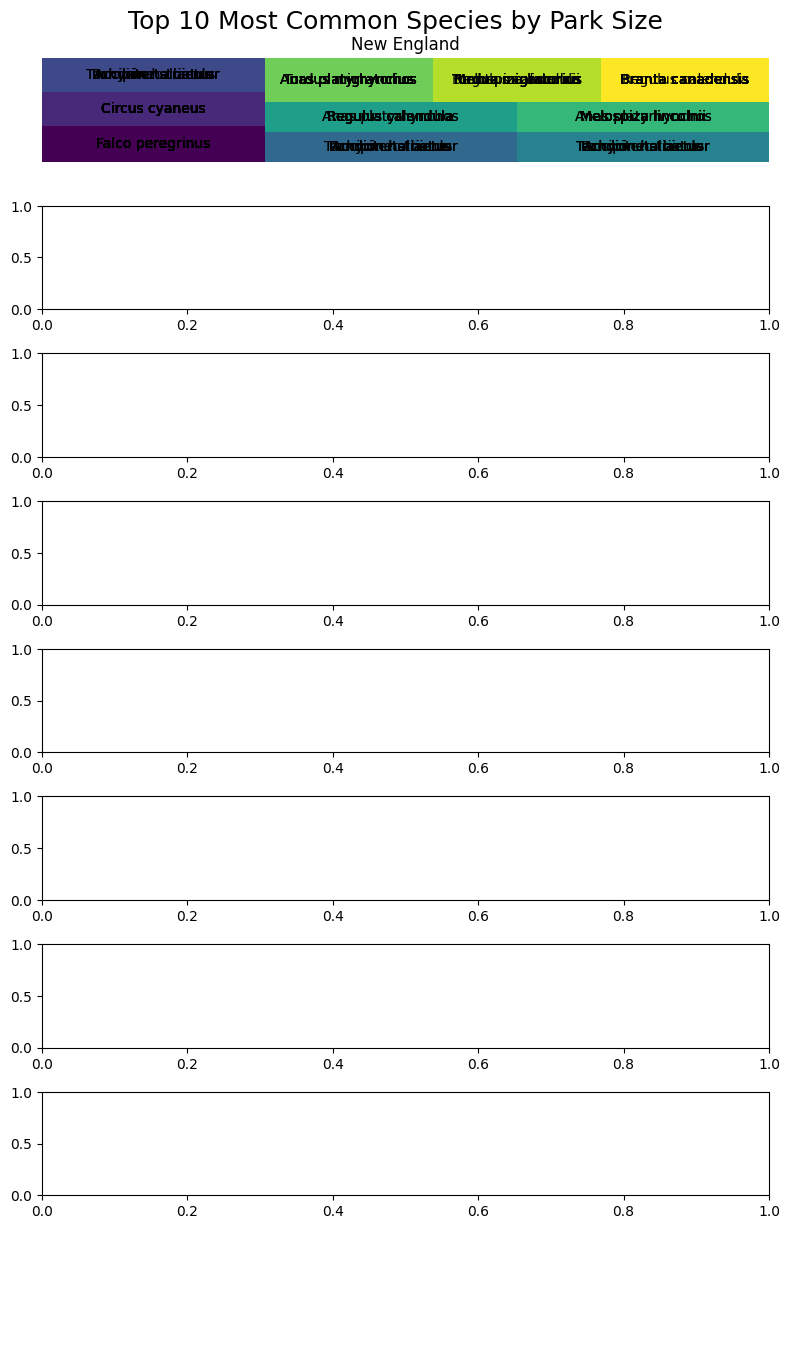

In [293]:
# Create a figure with three vertically stacked subplots
fig, axs = plt.subplots(9, 1, figsize=(8, 14))

create_treemap_by_region("Rocky Mountain", rm_df_final, 0, color_mapping)
create_treemap_by_region("West Coast", wc_df_final, 1, color_mapping)
create_treemap_by_region("Southwest", sw_df_final, 2, color_mapping)
create_treemap_by_region("South", s_df_final, 3, color_mapping)
create_treemap_by_region("Alaska", al_df_final, 4, color_mapping)
create_treemap_by_region("Great Plains", gp_df_final, 5, color_mapping)
create_treemap_by_region("Midwest", mw_df_final, 6, color_mapping)
create_treemap_by_region("Hawaii", hi_df_final, 7, color_mapping)
create_treemap_by_region("New England", ne_df_final, 8, color_mapping)




plt.suptitle('Top 10 Most Common Species by Park Size', fontsize=18)
# Adjust layout
plt.tight_layout()
plt.axis('off')
plt.show()